Musik ist ein wichtiger bestandteil unserer Kultur, sie kann bewegungen abbilden sowie ein teil der Identität sein. Das Musik ein Zentraler bestandteil der Kultur ist sieht man unter anderem an Shows wie Deutschland sucht den Superstar (DSDS) welche regelmäßig von über 2 Mio zuschauern verfolgt wird. Dabei setzen sich die Zuaschauer mit den auftritten sowie mit der qualität der Musik auseinander.

Das Musik eine Geselschaftlich so zentrale rolle spielt hat mehrere gründe. Sie fördert oder erzeugt ein gemeinschaftsgefühl in einer gruppe, durch gemeinsammes tanzen und Musikalische Rituale. Gleichzeitig zeigt sie zusammenhalt man zeigt anderen grupierungen wir halten zusammen wir sind stark. Diese eigenschaften wurden auch in den Befreiungskriegen(1813-1815) genutzt umd eine Nationalbewusstsein in Deutschland zu förden. Andernfalls wird Musik auch genutzt um gefühle auszudrücken, wie im Bluez wo die schwarze bevölkerung ihr leid in der Sklaverei ausdrückte.

Spotify hat die Musikidustrie grundsätlich verändert. Um 2010 hat polariesierten hauptsächlich illegale Streaming dienste im Internet. Dann kamm Spotify, dabei hat Spotify die Musikbranche in gewisser Weise gerrettet. Diese hatten Massive Probleme damit gegen illegales Streaming zu unterbinden. Als Antwort auf das illegale Streaming entwickelte sich Spotify 2011, welches die Musikindustrie revoultionierte. 2017 wurde durch Musiklabels dann zum ersten mal mehr geld mit Streaming als mit dem Verkauf von CDs verdient. Heutzutagen hat Spotify unter denn Anbietern von Musikstreamingdiensten einen Marktanteil von 38 %. Damit ist Spotify fast doppelt so groß wie sein nächster konkurent Apple Musik. Jedes Musiklabel und jeder Großer Musiker Arbeitet mit Spotify zusammen. Damit bilden die Spotify charts sehr gut die beliebtheit von Musik ab. 

Musikstreaming, Milliardenmarkt, kulturelle Bedeutung ...

## 1 Importierung benötigter Bibliotheken und des Datensatzes
In diesem Kapitel wird XY gemacht.

### 1.1 Laden der Bibliotheken
Innerhalb des Datenexplorationsprojektes werden die Bibliotheken XY benötigt.

In [14]:
import os
import time
import pandas as pd
import numpy as np
import seaborn as sns

import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from sklearn.linear_model import LinearRegression, Lasso, LassoCV
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_squared_error
from sklearn.compose import ColumnTransformer
from sklearn.svm import SVR
from sklearn.utils import resample

from matplotlib import pyplot as plt

### 1.2 Laden des Basis-Datensatzes

In [15]:
base_data = pd.read_csv("song_data.csv")
base_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18835 entries, 0 to 18834
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_name         18835 non-null  object 
 1   song_popularity   18835 non-null  int64  
 2   song_duration_ms  18835 non-null  int64  
 3   acousticness      18835 non-null  float64
 4   danceability      18835 non-null  float64
 5   energy            18835 non-null  float64
 6   instrumentalness  18835 non-null  float64
 7   key               18835 non-null  int64  
 8   liveness          18835 non-null  float64
 9   loudness          18835 non-null  float64
 10  audio_mode        18835 non-null  int64  
 11  speechiness       18835 non-null  float64
 12  tempo             18835 non-null  float64
 13  time_signature    18835 non-null  int64  
 14  audio_valence     18835 non-null  float64
dtypes: float64(9), int64(5), object(1)
memory usage: 2.2+ MB


Der Basisdatensatz besteht aus 18.835 Einträgen mit je 15 Attributen ... Keine Lücken

In [16]:
base_data.head()

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,In The End,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,Seven Nation Army,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,By The Way,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,How You Remind Me,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574


## 2 Übersicht und Interpretation der Datenwerte


In [17]:
base_data.nunique().sort_values()

audio_mode              2
time_signature          5
key                    12
song_popularity       101
danceability          849
energy               1132
speechiness          1224
audio_valence        1246
liveness             1425
acousticness         3209
instrumentalness     3925
loudness             8416
song_duration_ms    11771
tempo               12112
song_name           13070
dtype: int64

In [18]:
base_data.sort_values(by=["song_popularity"], ascending=False).head(20)

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
7568,Happier,100,214289,0.1910,0.687,0.792,0.0,5,0.167,-2.749,1,0.0452,100.015,4,0.671
15091,Happier,100,214289,0.1910,0.687,0.792,0.0,5,0.167,-2.749,1,0.0452,100.015,4,0.671
17392,Happier,100,214289,0.1910,0.687,0.792,0.0,5,0.167,-2.749,1,0.0452,100.015,4,0.671
14176,Happier,100,214289,0.1910,0.687,0.792,0.0,5,0.167,-2.749,1,0.0452,100.015,4,0.671
11665,Happier,100,214289,0.1910,0.687,0.792,0.0,5,0.167,-2.749,1,0.0452,100.015,4,0.671
11697,Happier,100,214289,0.1910,0.687,0.792,0.0,5,0.167,-2.749,1,0.0452,100.015,4,0.671
5593,Happier,100,214289,0.1910,0.687,0.792,0.0,5,0.167,-2.749,1,0.0452,100.015,4,0.671
4299,Happier,100,214289,0.1910,0.687,0.792,0.0,5,0.167,-2.749,1,0.0452,100.015,4,0.671
16497,Happier,100,214289,0.1910,0.687,0.792,0.0,5,0.167,-2.749,1,0.0452,100.015,4,0.671
17590,Happier,100,214289,0.1910,0.687,0.792,0.0,5,0.167,-2.749,1,0.0452,100.015,4,0.671


- song_name = Name des Liedes (String)
- song_popularity = Beliebtheit des Liedes in % (int 0-100) --> WAS WIRD IN PROZENT ANGEGEBEN (STREAMS?`)????? The popularity is calculated by algorithm and is based, in the most part, on the total number of plays the track has had and how recent those plays are.
- song_duration = Länge des Liedes in ms (int 12s-30min)
- acousticness = Akustik eines Liedes in % (float 0-1) Wert von 1.0 bedeutet, dass es ein akustisches Lied ist (nicht elektronisch verstärkt)
- danceability = Tanzbarkeit in % (float 0-1) Wert von 1.0 bedeutet, dass das Lied sehr um Tanzen anregt, basierend auf musikalische Elemente wie unteranderem Tempo, Stabilität des Rhytmik, Stärke des Bass' und weiteren.
- energy = Intensität und Aktivität des Liedes in % (float 0-1), basierend auf der Schnelligkeit, Lautstärke und Rauschen des Liedes sowie der generellen Entropie. Wert von 1.0 bedeutet, dass ein Lied sehr energetisch ist, beispielsweise Death Metal
- instrumentalness = Instrumentalität in % (float 0-1), gibt an in wie weit Vocals im Lied vorhanden sind. Je näher an 1.0, desto wahrscheinlicher Lied ohne Vocals, ab 0.5 kann davon ausgegangen werden, dass Lied instrumental ist
- key = Tonart in dem Lied (int -1-11), -1 wenn keine primäre Tonart erkannt wurde (https://de.wikipedia.org/wiki/Tonklasse)
- liveness = Wahrscheinlichkeit, dass das Lied eine Liveversion ist (float 0-1), basierend auf Zuschauer/Zuhörer die im Hintegrund entdeckt werden, ab 0.8 kann davon ausgegangen werden, dass es eine Liveversion ist
- loudness = gibt die durchschnittliche Lautstärke des Liedes in Decibel an (float -38.0 - 1.5), Lautstärke ist relativ angegeben
- audio_mode = Modalität der Tonleiter (int 0=Moll oder 1=Dur) 
- speechiness = Exklusiv gesprochen, zum Beispiel Reden oder Gedichte (Racism And Injustice von Martin L. King), alles >0.66 sehr wahrscheinlich, dass nur Gesprochen wird, alles <0.33 wenig/kein gesprochenes Wort
- tempo = Schätzung zur Geschwindigkeit des Liedes in Beats per Minute (BPM) (float)
- time_signature = Taktangabe (int 3-7), gibt Takt von 3/4 Takt bis 7/4 Takt an
- audio_valence = Positivität des Liedes (float 0-1), Eine hohe Wertigkeit deutet auf positive Stimmung hin (fröhlich, euphorisch), ein niedriger Wert von einer negativen (aggresiv, melancholisch)

Quelle: https://developer.spotify.com/documentation/web-api/reference/#/operations/get-several-audio-features

| Feldname | Datentyp / Wertebereich | Beschreibung |
| --- | --- | --- |
| song_name| String | Der Name des Liedes |
| song_popularity | int [0;100] | Die relative Beliebtheit eines Liedes in Prozent. Die Beliebtheit wird an der Gesamtzahl der Streams eines Liedes gemessen. Das Lied mit dem Wert 100 ist das beliebteste Lied. |
| song_duration | int | Gibt die Länge eines Liedes in Millisekunden an |
| acousticness | float [0;1] | Die Akustikt eines Liedes in Prozent. Ein Wert von 1.0 bedeutet, dass ein Lied sehr akustisch ist und nicht elektronisch verstärkt |
| danceability | float [0;1] | Die Tanzbarkeit eines Liedes in Prozent. Ein Wert von 1.0 bedeutet, dass dieses Lied zum Tanzen anregt. Der Wert wird über die musikalischen Elementen wie unteranderem dem Tempo, der Stabilität der Rhytmik, der Stärke des Bass's ermittelt. |
| energy | float [0;1] | | 

### 2.1 Umgang mit fehlenden Werten, Redundanzen und Inkonsistenzen

In [19]:
cleared = base_data.drop_duplicates(subset = ["song_name", "song_duration_ms"], keep = "last").reset_index(drop = True)
cleared.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14468 entries, 0 to 14467
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_name         14468 non-null  object 
 1   song_popularity   14468 non-null  int64  
 2   song_duration_ms  14468 non-null  int64  
 3   acousticness      14468 non-null  float64
 4   danceability      14468 non-null  float64
 5   energy            14468 non-null  float64
 6   instrumentalness  14468 non-null  float64
 7   key               14468 non-null  int64  
 8   liveness          14468 non-null  float64
 9   loudness          14468 non-null  float64
 10  audio_mode        14468 non-null  int64  
 11  speechiness       14468 non-null  float64
 12  tempo             14468 non-null  float64
 13  time_signature    14468 non-null  int64  
 14  audio_valence     14468 non-null  float64
dtypes: float64(9), int64(5), object(1)
memory usage: 1.7+ MB


Redundanzen sind vorhanden, diese werden entfernt anhand gleichem Songtitel und gleicher Songlänge. Dadurch 14.468 Songs, somit circa 4.400 Redundanzen entfernt

In [20]:
cleared.sort_values(by=["song_popularity"], ascending=False).head(20)

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
13326,Happier,100,214289,0.19100,0.687,0.792,0.000000,5,0.1670,-2.749,1,0.0452,100.015,4,0.671
13346,I Love It (& Lil Pump),99,127946,0.01140,0.901,0.522,0.000000,2,0.2590,-8.304,1,0.3300,104.053,4,0.329
13490,"Taki Taki (with Selena Gomez, Ozuna & Cardi B)",98,212500,0.15300,0.841,0.798,0.000003,1,0.0618,-4.206,0,0.2290,95.948,4,0.591
13592,Promises (with Sam Smith),98,213309,0.01190,0.781,0.768,0.000005,11,0.3250,-5.991,1,0.0394,123.070,4,0.486
13308,In My Feelings,98,217925,0.05890,0.835,0.626,0.000060,1,0.3960,-5.833,1,0.1250,91.030,4,0.350
13472,Eastside (with Halsey & Khalid),98,173799,0.55500,0.560,0.680,0.000000,6,0.1160,-7.648,0,0.3210,89.391,4,0.319
13290,Lucid Dreams,97,239835,0.34900,0.511,0.566,0.000000,6,0.3400,-7.230,0,0.2000,83.903,4,0.218
11606,In My Mind,97,184560,0.17600,0.694,0.770,0.000011,6,0.1180,-5.335,1,0.1490,125.905,4,0.163
13319,Falling Down,97,196400,0.01750,0.669,0.574,0.002940,4,0.1460,-6.442,0,0.0286,120.013,4,0.273
13469,SICKO MODE,97,312820,0.00513,0.834,0.730,0.000000,8,0.1240,-3.714,1,0.2220,155.008,4,0.446


Gegenprobe

In [21]:
cleared["song_name"].value_counts()

Heaven                      8
Fire                        8
You                         7
Fall                        7
Stay                        7
                           ..
Hallelujah I Love Her So    1
Punches (with LP)           1
Vibrate                     1
3's & 7's                   1
Est                         1
Name: song_name, Length: 13070, dtype: int64

Weiterhin sind Lieder mit dem selben Titel mehrfach vorhanden.
Fraglich ob vom selben Künstler und fraglich ob selbe Version des Liedes
Daher werden diese Redundanzen nicht entfernt.
Von den häufigen Songtiteln vorallem generische Wörte wie "Heaven", "Fire", "Fall", "Gone", "Stay" - Indiz, dass diese Lieder von unterschiedlichen Künstlern kommen könnten

### 2.2 Erweiterung des Datensatzes
Zur Erweiterung des Basis-Datensatzes wird die Spotify Web API (https://developer.spotify.com/documentation/web-api/) verwendet. Dazu werden eine Client-ID und ein Client-Secret benötigt, die im Rahmen von ... erstellt werden können. 

In [22]:
# CLIENT_ID = "28f2619d8a6242ceae8160c565174771"
# CLIENT_SECRET = "5f6cb53e2614428380966f0e93e72c16"

# sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=CLIENT_ID, client_secret=CLIENT_SECRET))

# expanded = base_data.copy()

# def expand_row(row):
#     time.sleep(0.1) # Sleep 100ms, 10 rps, 600 requests per min
#     results = sp.search(q=row.song_name, limit=50, type="track")

#     for _, track in enumerate(results["tracks"]["items"]):
#         if track["duration_ms"] == row.song_duration_ms:
#             row["artist"] = track["artists"][0]["name"]
#             row["explicit"] = track["explicit"]
#             return row
#     return row

# expanded = expanded.apply(expand_row, axis=1)

Ausführung der Zelle hat circa 79 Minuten gedauert. Im Verlauf davon wurden 14.468 Anfragen an Spotify gesendet. Insgesamt wurden in vorherigen Tests circa 20.000 Anfragen an Spotify gesendet.

In [23]:
# expanded.info()
# expanded.to_csv("song_data_expanded.csv")

Leider können bei circa 3900 Zeilen nicht zweifelsfrei Artist bzw. Explizit ermittelt werden. Würde man jeweils auf das erste Ergebnis zurück greifen, wenn mit gleicher Songlänge kein Lied gefunden würde, könnten alle Zeilen gefüllt werden. Aber es ist fraglich, ob das jeweilige Ergebnis richtig ist. Daher davon abgesehen

Wurde als eigene csv gecachet um weitere Anfragen zu vermeiden. Die CSV enthält sowohl die bereinigten Daten als auch die Erweiterungen.

In [24]:
cleared = pd.read_csv("song_data_expanded.csv")

## 3 Visualisierung und Korrelationen zwischen den Features


- Clustern nach Künstler, haben wenige Künstler viel Popularität oder eher One-Hit-Wunder? --> Z.b. Top 100 nur, da Künstler fehlen
- NLP vom Songtitel ?
- Genre in Bezug zum Zeitraum

### 3.1 Popularität eines Liedes

<AxesSubplot:>

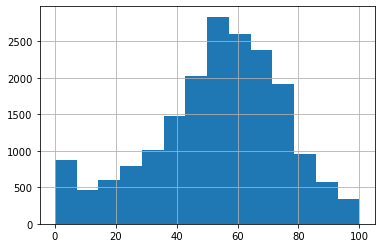

In [25]:
cleared["song_popularity"].hist(bins=14)

Die Popularität eines Liedes ist mit Ausnahe des Intervalls [0;10] normalverteilt.  --> Ist das dann noch normalverteilt???

In [26]:
cleared["song_popularity"].describe()

count    18835.000000
mean        52.991877
std         21.905654
min          0.000000
25%         40.000000
50%         56.000000
75%         69.000000
max        100.000000
Name: song_popularity, dtype: float64

### 3.2 Länge eines Liedes

count    1.883500e+04
mean     2.182116e+05
std      5.988754e+04
min      1.200000e+04
25%      1.843395e+05
50%      2.113060e+05
75%      2.428440e+05
max      1.799346e+06
Name: song_duration_ms, dtype: float64
median: 211306.0


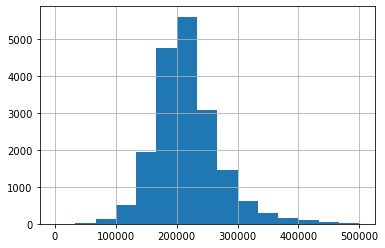

In [27]:
cleared["song_duration_ms"].hist(range=[0, 500000], bins=15)

print(cleared["song_duration_ms"].describe())
print("median:", cleared["song_duration_ms"].median())

Die Länge der Lieder ist normalverteilt, zeichnet sich durch Ausreißer auf der rechten Seite aus. 
Das arithmetische Mittel liegt bei X, der Median bei Y. Die Abweichung zwischen diesen beiden Maßen bedingt durch Ausreißer, Median robuster gegenüber Ausreißern (QUELLE)

<AxesSubplot:>

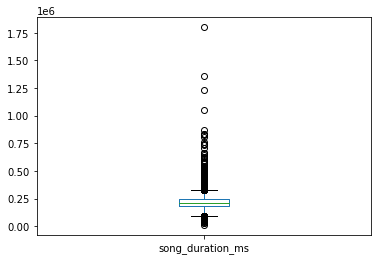

In [28]:
cleared["song_duration_ms"].plot.box()

Boxplot stellt dar, wie deutliche Ausreißer besonders nach oben hin auftreten. Evtl. Indikator welches Intervall betrachtet werden sollte - gerade wenn Filtering nötig wird, um bessere Ergebnisse zu erzielen

### 3.3 Musikalische Eigenschaften (numerisch) eines Liedes

<AxesSubplot:>

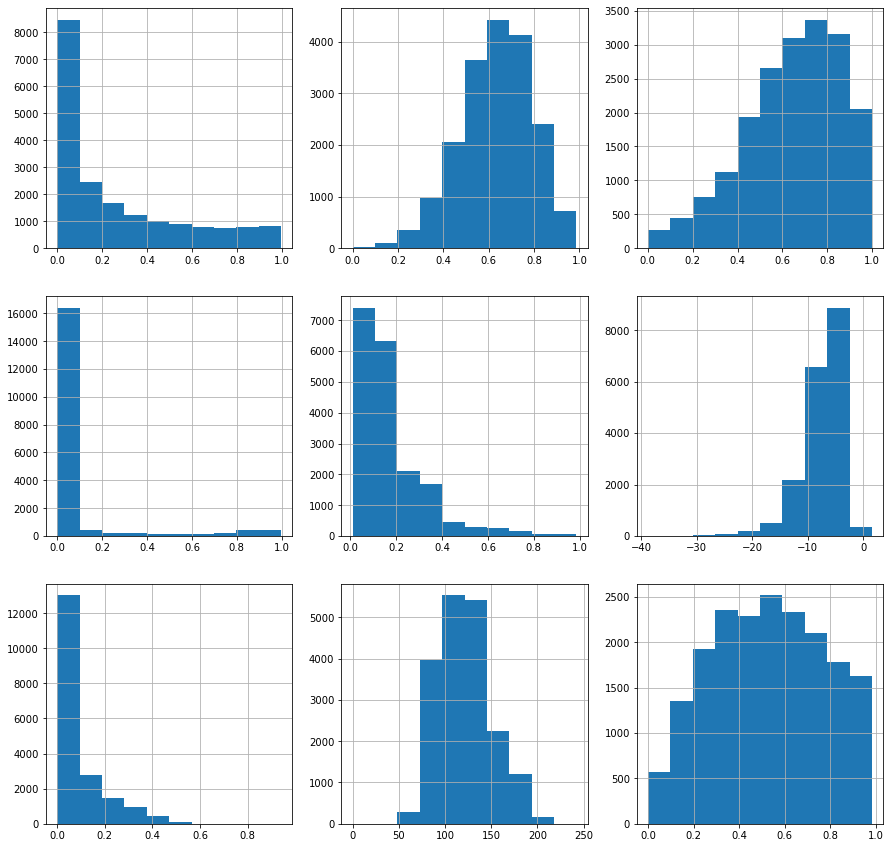

In [29]:
fig, axes = plt.subplots(nrows=3, ncols=3)
fig.set_figheight(15)
fig.set_figwidth(15)

cleared["acousticness"].hist(ax=axes[0,0])
cleared["danceability"].hist(ax=axes[0,1])
cleared["energy"].hist(ax=axes[0,2])

cleared["instrumentalness"].hist(ax=axes[1,0])
cleared["liveness"].hist(ax=axes[1,1])
cleared["loudness"].hist(ax=axes[1,2])

cleared["speechiness"].hist(ax=axes[2,0])
cleared["tempo"].hist(ax=axes[2,1])
cleared["audio_valence"].hist(ax=axes[2,2])

#### 3.3.1 Acousticness

<AxesSubplot:>

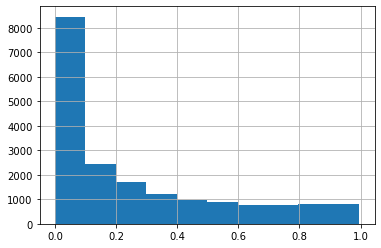

In [30]:
cleared["acousticness"].hist()

Die Akustik der Lieder ist mit Ausnahme des Intervalls [0.0;0.1] nahezu gleichverteilt

In [31]:
cleared["acousticness"].describe()

count    18835.000000
mean         0.258539
std          0.288719
min          0.000001
25%          0.024100
50%          0.132000
75%          0.424000
max          0.996000
Name: acousticness, dtype: float64

#### 3.3.2 Danceability

<AxesSubplot:>

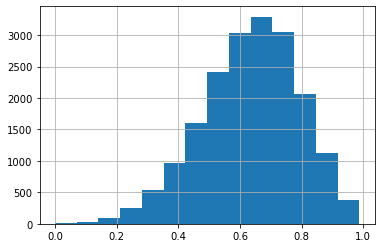

In [32]:
cleared["danceability"].hist(bins=14)

Normalverteilt?

In [33]:
cleared["danceability"].describe()

count    18835.000000
mean         0.633348
std          0.156723
min          0.000000
25%          0.533000
50%          0.645000
75%          0.748000
max          0.987000
Name: danceability, dtype: float64

#### 3.3.3 Energy

<AxesSubplot:>

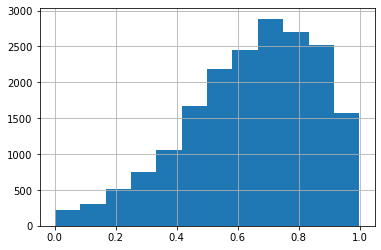

In [34]:
cleared["energy"].hist(bins=12)

In [35]:
cleared["energy"].describe()

count    18835.000000
mean         0.644995
std          0.214101
min          0.001070
25%          0.510000
50%          0.674000
75%          0.815000
max          0.999000
Name: energy, dtype: float64

#### 3.3.4 Instrumentalness

<AxesSubplot:>

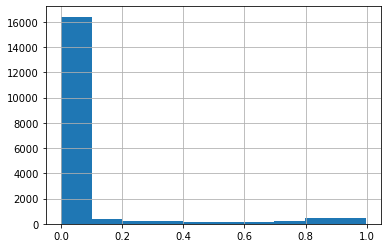

In [36]:
cleared["instrumentalness"].hist()

Großteil der Werte Liegen in dem Intervall [0;0.1]. Deswegen dort genauere Betrachtung

0.000000    7150
0.000003      37
0.001070      21
0.001140      20
0.000512      18
            ... 
0.024900       1
0.009610       1
0.000008       1
0.023500       1
0.000673       1
Name: instrumentalness, Length: 3925, dtype: int64

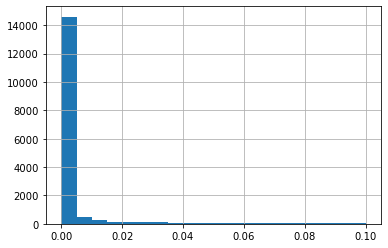

In [37]:
cleared["instrumentalness"].hist(range=[0, 0.1], bins=20)
cleared["instrumentalness"].value_counts()

In [38]:
cleared["instrumentalness"].describe()

count    18835.000000
mean         0.078008
std          0.221591
min          0.000000
25%          0.000000
50%          0.000011
75%          0.002570
max          0.997000
Name: instrumentalness, dtype: float64

#### 3.3.5 Liveness

<AxesSubplot:>

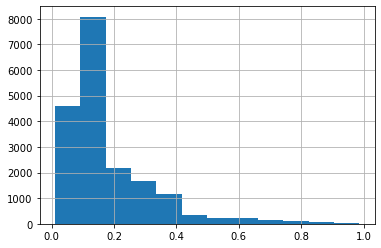

In [39]:
cleared["liveness"].hist(bins=12)

In [40]:
cleared["liveness"].describe()

count    18835.000000
mean         0.179650
std          0.143984
min          0.010900
25%          0.092900
50%          0.122000
75%          0.221000
max          0.986000
Name: liveness, dtype: float64

#### 3.3.6 Loudness

<AxesSubplot:>

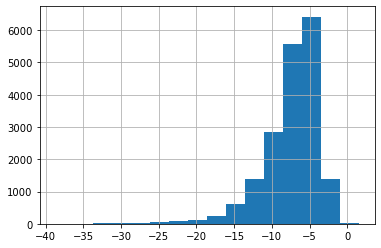

In [41]:
cleared["loudness"].hist(bins=16)

In [42]:
cleared["loudness"].describe()

count    18835.000000
mean        -7.447435
std          3.827831
min        -38.768000
25%         -9.044000
50%         -6.555000
75%         -4.908000
max          1.585000
Name: loudness, dtype: float64

#### 3.3.7 Speechiness

<AxesSubplot:>

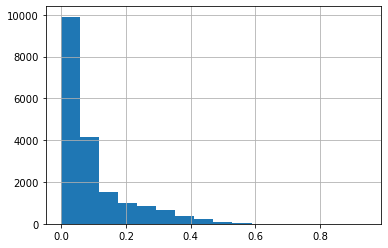

In [43]:
cleared["speechiness"].hist(bins=16)

In [44]:
cleared["speechiness"].describe()

count    18835.000000
mean         0.102099
std          0.104378
min          0.000000
25%          0.037800
50%          0.055500
75%          0.119000
max          0.941000
Name: speechiness, dtype: float64

#### 3.3.8 Tempo

<AxesSubplot:>

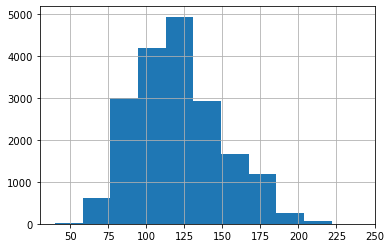

In [45]:
cleared["tempo"].hist(range=[40, 240], bins=11)

In [46]:
cleared["tempo"].describe()

count    18835.000000
mean       121.073154
std         28.714456
min          0.000000
25%         98.368000
50%        120.013000
75%        139.931000
max        242.318000
Name: tempo, dtype: float64

#### 3.3.9 Audio Valence

<AxesSubplot:>

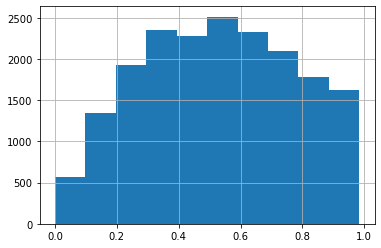

In [47]:
cleared["audio_valence"].hist()

In [48]:
cleared["audio_valence"].describe()

count    18835.000000
mean         0.527967
std          0.244632
min          0.000000
25%          0.335000
50%          0.527000
75%          0.725000
max          0.984000
Name: audio_valence, dtype: float64

## 3.4 Musikalische Eigenschaften (kategorisch) eines Liedes

### 3.4.1 key (Tonart)

([<matplotlib.axis.XTick at 0x15c72f00b20>,
 [Text(0, 0, 'C'),
  Text(1, 0, 'C#'),
  Text(2, 0, 'D'),
  Text(3, 0, 'D#'),
  Text(4, 0, 'E'),
  Text(5, 0, 'F'),
  Text(6, 0, 'F#'),
  Text(7, 0, 'G'),
  Text(8, 0, 'G#'),
  Text(9, 0, 'A'),
  Text(10, 0, 'A#'),
  Text(11, 0, 'B')])

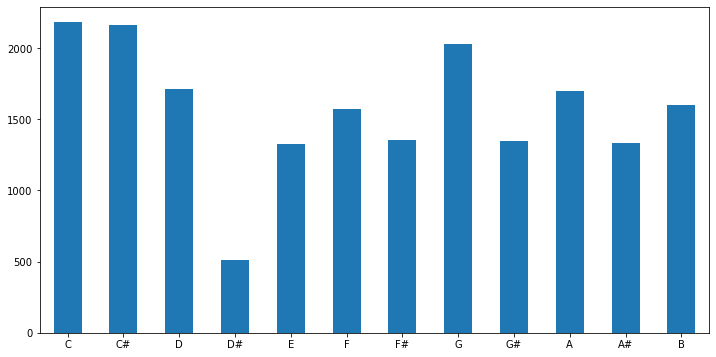

In [49]:
fig, ax = plt.subplots(figsize=(12, 6))
cleared["key"].value_counts().sort_index().plot.bar()

plt.xticks(range(0, 12), labels=["C", "C#", "D", "D#", "E", "F", "F#", "G", "G#", "A", "A#", "B"], rotation=0)

In [50]:
cleared["key"].value_counts()

0     2182
1     2164
7     2032
2     1715
9     1698
11    1600
5     1574
6     1351
8     1349
10    1331
4     1327
3      512
Name: key, dtype: int64

### 3.4.2 audio_mode (Modalität der Tonleiter)

([<matplotlib.axis.XTick at 0x15c734cf7c0>,
 [Text(0, 0, 'Moll'), Text(1, 0, 'Dur')])

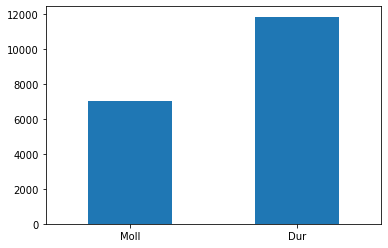

In [51]:
cleared["audio_mode"].value_counts().sort_index().plot.bar()
plt.xticks([0, 1], labels=["Moll", "Dur"], rotation=0)

### 3.4.3 time_signature (Taktangabe)

Taktangabe (int 3-7), gibt Takt von 3/4 Takt bis 7/4 Takt an

([<matplotlib.axis.XTick at 0x15c7336b4f0>,
 [Text(0, 0, '3/4'),
  Text(1, 0, '4/4'),
  Text(2, 0, '5/4'),
  Text(3, 0, '6/4'),
  Text(4, 0, '7/4')])

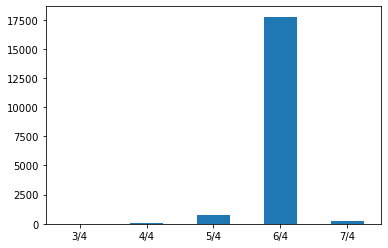

In [52]:
cleared["time_signature"].value_counts().sort_index().plot.bar()
plt.xticks(range(0, 5), labels=["3/4", "4/4", "5/4", "6/4", "7/4"], rotation=0)

# Irgendwas stimmt hier noch nicht 4/4 am häufigsten eig

In [53]:
cleared["time_signature"].describe()

count    18835.000000
mean         3.959119
std          0.298533
min          0.000000
25%          4.000000
50%          4.000000
75%          4.000000
max          5.000000
Name: time_signature, dtype: float64

## 3.5 Korrelationen zwischen den Datenwerten

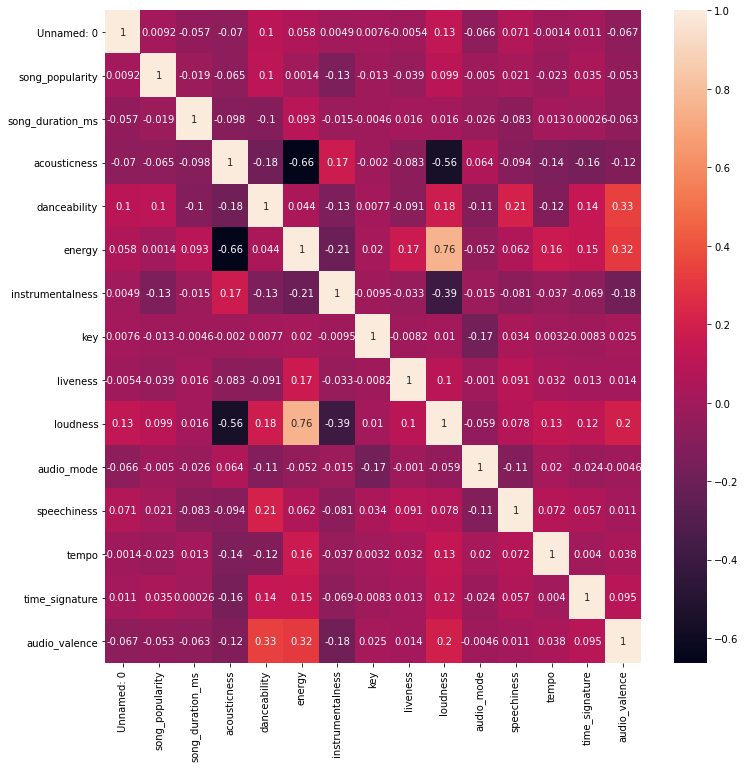

In [54]:
# Instrumentalness mit accousticness
matrix = cleared.corr()
fig, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(matrix, annot=True)
plt.show()

## 4 Datentransformation und Preprocessing

Erste Ergebnisse waren sehr schlecht. R² Werte von 0.02 erhalten

Normalisierung wird verwendet um Werte in ein festes Intervall zu überführen. Die meisten Werten nicht notwendig, da sie bereits in dem Intervall [0, 1] liegen.

### 4.1 Auswahl der Features

In [55]:
X = cleared[["song_duration_ms", "acousticness", "danceability", "energy", "instrumentalness", "key", "liveness", "loudness", "audio_mode", "speechiness", "tempo", "time_signature", "audio_valence"]]
y = cleared["song_popularity"]

### 4.2 Trainings- und Testdatensatz Split

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=7, test_size=0.2)

print("Trainingsdatensatz:", len(X_train), "Testdatensatz:", len(X_test))
X_train.head()

Trainingsdatensatz: 15068 Testdatensatz: 3767


,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
3101,157435,0.067500,0.708,0.729,0.00000,8,0.1650,-7.618,1,0.0311,117.003,4,0.562
7371,311866,0.007280,0.625,0.726,0.00000,10,0.3180,-7.731,0,0.1550,103.980,4,0.483
4484,166648,0.105000,0.772,0.423,0.87900,0,0.0797,-9.898,1,0.0748,90.008,4,0.381
11920,164905,0.101000,0.706,0.913,0.00029,4,0.1230,-3.892,1,0.0394,125.952,4,0.674
13814,240000,0.000076,0.737,0.662,0.20400,6,0.0496,-7.497,1,0.0441,128.005,4,0.888


### 4.3 Normalisierung und Standardisierung der Features

In [57]:
# scaler = RobustScaler()
# scaler.fit(y_train["song_popularity"])

# y_train["song_popularity"] = scaler.transform(y_train[["song_popularity"]])
# y_test["song_popularity"] = scaler.transform(y_test[["song_popularity"]])

In [58]:
y_train.head()

3101     62
7371     77
4484     44
11920    40
13814    36
Name: song_popularity, dtype: int64

Standardisierung der unabhängigen Features, zentriert Werte um 0 herum

In [59]:
scaler = StandardScaler()
scaler.fit(X_train)

ct = ColumnTransformer([
    ("StandardScaler", scaler, ["song_duration_ms", "acousticness", "danceability", "energy", "instrumentalness", "liveness", "loudness", "speechiness", "tempo", "audio_valence"])
], remainder="passthrough")

X_train = pd.DataFrame(ct.fit_transform(X_train), index = X_train.index)
X_test = pd.DataFrame(ct.fit_transform(X_test), index = X_test.index)

#X_train = pd.DataFrame(scaler.transform(X_train), columns = X_train.columns, index = X_train.index) # diskrete Werte nicht skalieren
#X_test = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns, index = X_test.index)

In [60]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
3101,-1.007614,-0.665551,0.477703,0.391495,-0.354675,-0.103130,-0.046864,-0.679003,-0.145302,0.133768,8.0,1.0,4.0
7371,1.555473,-0.873536,-0.050379,0.377461,-0.354675,0.959561,-0.076396,0.514054,-0.597964,-0.189777,10.0,0.0,4.0
4484,-0.854706,-0.536035,0.884899,-1.039950,3.582252,-0.695597,-0.642731,-0.258207,-1.083612,-0.607519,0.0,1.0,4.0
11920,-0.883635,-0.549850,0.464978,1.252233,-0.353376,-0.394849,0.926908,-0.599081,0.165753,0.592466,4.0,1.0,4.0
13814,0.362715,-0.898416,0.662214,0.078074,0.559015,-0.904662,-0.015241,-0.553824,0.237113,1.468905,6.0,1.0,4.0


In [61]:
y = y.apply(lambda x: x / 100)

## 5 Maschinelles Lernen (Regression)

### 5.1 Multiple lineare Regression

In [62]:
reg = LinearRegression()
reg.fit(X_train, y_train)

score = reg.score(X_test, y_test)
mse = mean_squared_error(y_test, reg.predict(X_test), squared=False)

print("R² score:", score)
print("RMSE error:", mse)

print("Koeffizienten:", reg.coef_)

# Multiple Variable Linear Regression (nicht robust)
# Weder robust noch erfüllt es Anforderung, dass Ergebnisse in dem Interval liegen
# Könnte trotzdem ersten Anhaltspunkt geben und vielleicht auch in den Erarbeitungsprozess gute Einblicke geben,

R² score: 0.04074930714455127
RMSE error: 21.633149758955962
Koeffizienten: [-0.36792145 -1.09000547  2.10613219 -2.11936952 -2.41772172 -0.59514514
  2.45795075 -0.29380237 -0.3154533  -2.28479223 -0.07174733  0.09310985
  1.27514655]


Linare Regression ungeeignet, da abhängige Zielvariable p, die die Popularität eines Liedes angibt, folgende Eigenschaften besitzt:

\begin{align}
p \in \{x\in\mathbb{N} | x >= 0 \wedge x <= 100\}
\end{align}

Zudem könnten die Beziehungen nicht linear sein.

### 5.2 Lasso Regression

Kreuzvalidierung um Hyperparameter bei Lasso-Regression zu optimieren

In [63]:
reg = LassoCV(cv=5, random_state=7, max_iter=10000)
reg.fit(X_train, y_train)

print(reg.alpha_)

score = reg.score(X_test, y_test)
mse = mean_squared_error(y_test, reg.predict(X_test), squared=False)

print("R² score:", score)
print("RMSE error:", mse)

0.03668394372595554
R² score: 0.04031668502339525
RMSE error: 21.638027484986576


### 5.3 Random Forest Regression

In [64]:
rf = RandomForestRegressor(n_estimators=1000, random_state=7)
rf.fit(X_train, y_train)

score = rf.score(X_test, y_test)
mse = mean_squared_error(y_test, rf.predict(X_test), squared=False)

print("R² score:", score)
print("RMSE error:", mse)

R² score: 0.10787167970610478
RMSE error: 20.862548487100838


### 5.4 Support Vector Regression

In [65]:
svr = SVR(kernel="rbf")
svr.fit(X_train, y_train)

score = svr.score(X_test, y_test)
mse = mean_squared_error(y_test, svr.predict(X_test), squared=False)

print("R² score:", score)
print("RMSE error:", mse)

R² score: 0.04542342767060925
RMSE error: 21.580379702343986


### 5.5 Polynomiale Regression

In [66]:
# Evtl Kombination Logit

# Beta Regression

### 5.6 Gradient Boosting Regression

In [67]:
gbr = GradientBoostingRegressor()

n_estimators = [int(x) for x in np.linspace(start = 1, stop = 1000, num = 1000)] # number of trees in the random forest
max_features = ['auto', 'sqrt'] # number of features in consideration at every split
max_depth = [int(x) for x in np.linspace(10, 120, num = 12)] # maximum number of levels allowed in each decision tree
min_samples_split = [2, 6, 10] # minimum sample number to split a node
min_samples_leaf = [1, 3, 4] # minimum sample number that can be stored in a leaf node

random_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
}

search = RandomizedSearchCV(estimator = gbr, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2, random_state=35, n_jobs = -1)


search.fit(X_train, y_train)

# print ('Random grid: ', random_grid, '\n')

# print the best parameters
print ('Best Parameters: ', search.best_params_, ' \n')


Fitting 5 folds for each of 100 candidates, totalling 500 fits


In [ ]:
gbr = GradientBoostingRegressor(n_estimators=1, min_samples_split=6, min_samples_leaf=1, max_features="sqrt", max_depth=10)
gbr.fit(X_train, y_train)

rmse = mean_squared_error(y_test, gbr.predict(X_test), squared=False)
r2score = gbr.score(X_test, y_test)

print(rmse, r2score)

21.97734603972498 0.009981977448671797


Ausreißer beachten, gibt robuste Regressionsalgorithmen

Ist es egal, ob unsere Ergebnisse Kommazahlen von 0-100 oder Ganzzahlen von 0-100 sind? Wshl ja, weil man die Kommazahlen ja einfach runden könnte und dann aufs selbe hinauskommt. Bei Berechnungen kommt es wshl automatisch zu Kommazahlen

## 6. Transformation des Regressionsproblems in ein Klassifikationsproblem

In [ ]:
def get_bins(n, feature):
    step, bins = 1 / n, []

    for i in range(n):
        q = feature.quantile(step * i)
        bins.append(q)

    return bins

get_bins(4, cleared["song_popularity"])

[0.0, 40.0, 56.0, 69.0]

Aufspaltung nach Quantile macht eigentlich weniger Sinn ???

In [ ]:
print(cleared["song_popularity"].describe())
#bins = get_bins(4, cleared["song_popularity"])
bins = [0, 25, 50, 75] # 4 Klassen

y_train_class = np.digitize(y_train, bins)
y_test_class = np.digitize(y_test, bins)

df = pd.DataFrame(y_train_class)
df.value_counts()

# auf gleichverteilung bei klassifikation achten

count    18835.000000
mean        52.991877
std         21.905654
min          0.000000
25%         40.000000
50%         56.000000
75%         69.000000
max        100.000000
Name: song_popularity, dtype: float64


3    7016
2    3966
4    2269
1    1817
dtype: int64

## 7. Maschinelles Lernen (Klassifikation)

### 7.2 RandomForestClassifier

In [ ]:
rf = RandomForestClassifier(n_estimators=1000, random_state=7)
rf.fit(X_train, y_train_class)

accuracy = rf.score(X_test, y_test_class)
print("Durchschnittliche Genauigkeit (accuracy):", accuracy)

Durchschnittliche Genauigkeit (accuracy): 0.5338465622511283


[[  25   84  354    1]
 [   2  291  693    4]
 [   5  157 1560    2]
 [   1   33  420  135]]


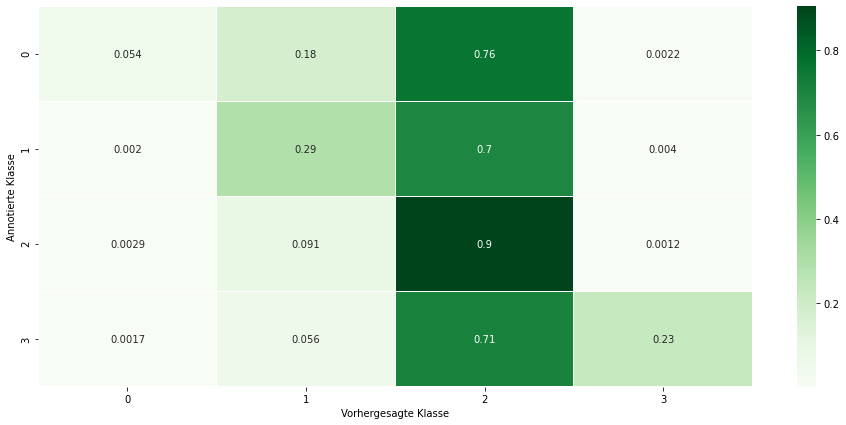

In [ ]:
y_pred_test = rf.predict(X_test)
matrix = confusion_matrix(y_test_class, y_pred_test)
print(matrix)

matrix = matrix.astype("float") / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.heatmap(matrix, annot=True, annot_kws={"size":10}, cmap=plt.cm.Greens, linewidths=0.2)

plt.xlabel("Vorhergesagte Klasse")
plt.ylabel("Annotierte Klasse")
plt.show()

In [ ]:
# Logistische Regression

# Random Forest

# ...

## 8 Diskussion

- Auf welcher Basis wurden die 18.000 Lieder ausgewählt? Stichprobenverzerrung???
- Datensatz wahrscheinlich aus 2018. Wie wirken sich Trends evtl. aus?
- Was bedeutet Popularität?
- Der Datensatz besteht nicht nur aus Musik, sondern auch aus Reden (bsp. Rede von Martin Luther King) und weiteren nicht musikalischen 
- Wie zuverlässig sind die Features? Sind die Ergebnisse statistisch signifikant?

WICHTIGE ENTDECKUNG:
Wenn Redundanzen nicht entfernt werden, steigt der R²-Score bei der Random Forest Regression von 0.02 auf 0.38. Warum ist das so? Liegt es daran, dass 4.000 Redundanzen entfernt wurden (circa 25% des Datensatzes), diese auch zum Teil in den Testdaten 

Performance Unterschiedliche Modelle aus 5 vergleichen

### 8.1 Limitationen

- Es wurde auf bereits ermittelte Features zurükgegriffen 
- falsche Ergebnisse dort wirken sich auch unter Umständen auf die Modelle die im Rahmen dieser Ausarbeiten aufgestellt wurden aus

### 8.2 Konklusion

## Quellenverzeichnis
